In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:

from PIL import Image


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasets/train'
valid_path = 'datasets/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7771 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                           shuffle=False)

Found 1943 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Vasavi\anaconda3\envs\gpu1\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
243/243 [==============================] - 353s 1s/step - loss: 0.8127 - accuracy: 0.8778 - val_loss: 0.3307 - val_accuracy: 0.9434
Epoch 2/10
243/243 [==============================] - 473s 2s/step - loss: 0.3906 - accuracy: 0.9434 - val_loss: 0.9559 - val_accuracy: 0.8996
Epoch 3/10
243/243 [==============================] - 394s 2s/step - loss: 0.3532 - accuracy: 0.9541 - val_loss: 0.3307 - val_accuracy: 0.9547
Epoch 4/10
243/243 [==============================] - 378s 2s/step - loss: 0.3020 - accuracy: 0.9596 - val_loss: 0.3881 - val_accuracy: 0.9578
Epoch 5/10
243/243 [==============================] - 348s 1s/step - loss: 0.3592 - accuracy: 0.9606 - val_loss: 0.5736 - val_accuracy: 0.9496
Epoch 6/10
243/243 [==============================] - 339s 1s/step - loss: 0.4209 - accuracy: 0.9578 - val_loss: 1.6698 - val_accuracy: 0.8693
Epoch 7/10
243/243 [==============================] - 341s 1s/step - loss: 0.4123 - accuracy: 0.9659 - val_loss: 0.3901 - val_accuracy: 0.9712

In [18]:
import matplotlib.pyplot as plt

In [17]:
pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 1.9 MB/s eta 0:00:04
     ---------------------------------------- 0.1/7.6 MB 1.3 MB/s eta 0:00:06
      --------------------------------------- 0.1/7.6 MB 1.1 MB/s eta 0:00:08
      --------------------------------------- 0.2/7.6 MB 1.0 MB/s eta 0:00:08
     - -------------------------------------- 0.2/7.6 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.3/7.6 MB 1.0 MB/s eta 0:00:08
     - -------------------------------------- 0.3/7.6 MB 981.5 kB/s eta 0:00:08
     - -------------------------------------- 0.4/7.6 MB 995.6 kB/s eta 0:00:08
     -- ------------------------------------- 0.4/7.6 MB 981.2 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.6 MB 994.6 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.6 MB 962.6 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.6 MB 1.0 

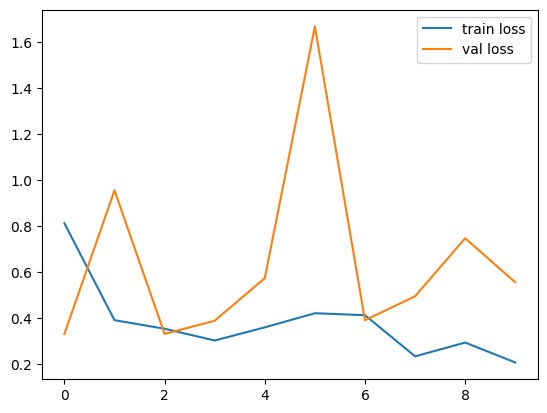

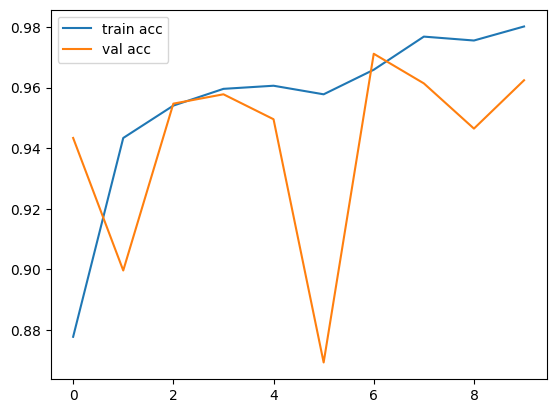

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)


In [22]:
y_pred

array([[0.0000000e+00, 2.3285852e-37, 0.0000000e+00, 1.0000000e+00],
       [1.9387640e-33, 6.7452505e-18, 8.2041004e-36, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [9.9957806e-01, 4.2188764e-04, 5.6834756e-35, 3.6623081e-22],
       [1.0000000e+00, 0.0000000e+00, 4.3947898e-29, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([3, 3, 1, ..., 0, 0, 2], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_inception.h5')

In [27]:
ref=dict(zip(list(training_set.class_indices.values()), list(training_set.class_indices.keys())))
ref

{0: 'apple_scab', 1: 'black_rot', 2: 'cedar_apple_rust', 3: 'healthy'}

In [35]:
from keras_preprocessing.image.utils import img_to_array

def predict(path):
  img=load_img(path, target_size=(224,224))
  
  i= img_to_array(img)
   
  im= preprocess_input(i)

  img= np.expand_dims(im, axis=0)
  pre= np.argmax(model.predict(img))
  print(pre)
  print(f" The Prediction is {ref[pre]} disease")

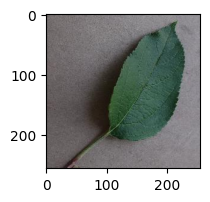

3
 The Prediction is healthy disease


In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "datasets/test/healthy/0580ddaa-0221-4adc-8b64-8ce1842f5f07___RS_HL 6242.JPG"
image = mpimg.imread(path)

plt.figure(figsize=(2,2))
imgplot = plt.imshow(image)
plt.show()
predict(path)

0
 The Prediction is apple_scab disease


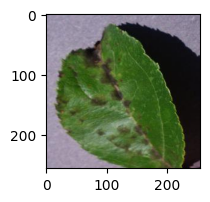

In [38]:
import matplotlib.image as mpimg

path= "datasets/test/apple_scab/0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG"
image= mpimg.imread('datasets/test/apple_scab/0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG')
plt.figure(figsize=(2,2))
imglpot=plt.imshow(image)
#print(load_img(path))


predict(path)